# Transfer Learning

#### Neural Network for Suggestive CAD

--------------------------------------------------------------------------------------------------------------------------------

    Import packages

In [36]:
import numpy as np
import collections
#from tensorflow.python.framework import dtypes

from os import listdir
import os
from os.path import isfile, join
import numpy as np
import cv2
import scipy as misc

import matplotlib.pylab as plt
%matplotlib inline

from __future__ import division
from __future__ import print_function

import argparse
import sys

import glob
#import param
import time

#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets
import IPython.display as display

import tensorflow as tf

#import pydotplus as pydot
#import graphviz



# KERAS IMPORTS
import keras
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import History 
from keras.models import model_from_json

#SKLEARN
from sklearn.metrics import classification_report

In [2]:
###From https://gist.github.com/ambodi/408301bc5bc07bc5afa8748513ab9477#file-dataset-py-L74

In [3]:
###Data from  https://www.kaggle.com/c/dogs-vs-cats/data

## Saving raw data to npy

#### Load data

In [2]:
#path to directory
path_train = '/data/_train/'
path_val = '/data/_val/'

#path_train = 'raw_data/train/'
#path_val = 'raw_data/val/'

img_size= 200

#get folder names
def directory_scan(path):
    dirlist = [ item for item in os.listdir(path) if os.path.isdir(os.path.join(path, item)) ]
    return dirlist

#build labels and image arrays, resize image to 500*500
def read_images_in_folder(dirlist, path):
    images=[]
    labels = []
    count = 0
    for i in range(len(dirlist)):
        image_stack = []
        for img in glob.glob(path+dirlist[i]+'/*jpg'):
            count=count+1
            labels.append(dirlist[i])
            IMG = cv2.imread(img)
            #RGB to grey scale
            #IMG_2= cv2.cvtColor( IMG, cv2.COLOR_RGB2GRAY )
            im_resize = cv2.resize(IMG, (img_size, img_size), 3)
            images.append(im_resize)
        #np_images = np.array(image_stack)
        
    return images, labels, count

In [ ]:
start = time.time()

if __name__ == '__main__':
    dirlist_val = directory_scan(path_val)
    images_val,labels_val,count_val= read_images_in_folder(dirlist_val, path_val)

if __name__ == '__main__':
    dirlist_train = directory_scan(path_train)
    images_train,labels_train,count_train = read_images_in_folder(dirlist_val, path_train)
    #dirlist_test = directory_scan(path_test)
    #images_test,labels_test,count_test = read_images_in_folder(dirlist_test, path_test)


print('There are '+ str(count_train) +' training images')
print('There are '+ str(count_val) +' testing images')

nb_img_train = count_train
nb_img_val = count_val

stop = time.time()
print("Execution time = " + str(int(((stop-start)-(stop-start)%60)/60)) +" min "+str((stop-start)%60)+" sec")

## TEST IMAGE TEST

In [12]:
#SIZE BEFORE
size = np.array(images_train).nbytes
print(format (size, ',d'))

size_val = np.array(images_val).nbytes
print(format (size_val, ',d'))

8,388,000,000
1,980,000,000


In [ ]:
#reshpae
train_img = np.array(images_train)
val_img = np.array(images_val)

#to float
train_imgs = train_img.astype(np.float16) / 255
val_imgs = val_img.astype(np.float16) / 255

print("done")

In [ ]:
#SIZE AFTER
size_tr = np.array(train_imgs).nbytes
print(format (size_tr, ',d'))

size_vl = np.array(val_imgs).nbytes
print(format (size_vl, ',d'))

In [ ]:
# saving data train
np.save('test-npy/float_img_tr',train_imgs)
np.save('test-npy/float_lab_tr',labels_train)

# saving data val
np.save('test-npy/float_img_val',val_imgs)
np.save('test-npy/float_lab_val',labels_val)

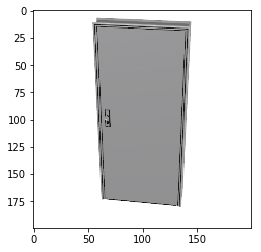

In [7]:
plt.imshow(val_imgs[1].astype('float32'))

In [8]:
train_images = train_imgs
train_labels = labels_train

val_images = val_imgs
val_labels = labels_val

#### Load NPY data

In [101]:
#LOAD TRAIN
#load images
train_images = np.load('test-npy/float_img_tr.npy')

#load labels
train_labels = np.load('test-npy/float_lab_tr.npy')

In [102]:
#LOAD VALIDATION
#load images
val_images = np.load('test-npy/float_img_val.npy')

#load labels
val_labels = np.load('test-npy/float_lab_val.npy')

bed


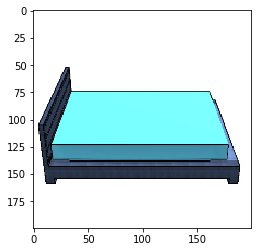

In [103]:
index = 200
print(train_labels[index])
plt.imshow(train_images[index].astype(np.float32))

In [9]:
nb_img_train = len(train_images)
nb_img_val = len(val_images)

In [10]:
train_img = train_images.reshape([-1,img_size,img_size,3])
val_img = val_images.reshape([-1,img_size,img_size,3])

#### One Hot Encoding of Labels

In [11]:
#LABEL ONE HOT ENCODING
#Training
k=0
for i in range(len(dirlist_val)):
    for j in range(len(train_labels)):
        if(train_labels[j]==dirlist_val[i]):
            train_labels[j]=k
    k=k+1
    
#Validation
g=0
for l in range(len(dirlist_val)):
    for h in range(len(val_labels)):
        if(val_labels[h]==dirlist_val[l]):
            val_labels[h]=g
    g=g+1

In [12]:
train_lab= to_categorical(train_labels)
val_lab = to_categorical(val_labels)

In [30]:
val_lab.shape

(16500, 14)

In [14]:
def Plot_accuracy(train_acc, val_acc, Title):
    x = [i for i in range(0, len(train_acc))]
    y= train_acc
    plt.plot(x,y)
    
    x = [i for i in range(0, len(val_acc))]
    y= val_acc
    plt.plot(x,y)
    
    plt.ylabel('Accuracy')
    plt.xlabel('Steps')
    plt.xticks(x)
    plt.ylim(ymax=1)
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.grid(True)
    plt.title(Title)
    plt.show()
    
def Plot_Loss(train_loss, val_loss, Title):
    x = [i for i in range(0, len(val_loss))]
    y= train_loss
    plt.plot(x,y)

    x = [i for i in range(0, len(val_loss))]
    y= val_loss
    plt.plot(x,y)
    
    plt.ylabel('Loss')
    plt.xlabel('Steps')
    plt.xticks(x)
    plt.ylim(ymax=2)
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.grid(True)
    plt.title(Title)
    plt.show()

--------------------------------------------------------------------------------------------------------------------------------

## VGG

https://www.learnopencv.com/keras-tutorial-transfer-learning-using-pre-trained-models/

    Import VGG pretrained network

In [15]:
from keras import applications

In [16]:
conv_base = applications.VGG16(weights='imagenet', include_top=False, input_shape=(200, 200,3))

In [17]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0         
__________

    Preprocess dataset with VGG model

In [20]:
#gets feature maps for dataset based on inital VGG model
#    >>from training set to feature map
start = time.time()

train_features = conv_base.predict(train_img, verbose=1)
#train_features = np.reshape(train_features, (len(train_img), 3 * 3 * 512))

stop = time.time()
print("Execution time = " + str(int(((stop-start)-(stop-start)%60)/60)) +" min "+str((stop-start)%60)+" sec")

69900/69900 [==============================] - 649s 9ms/step
Execution time = 10 min 48.708330392837524 sec


In [ ]:
#SAVE IMAGES, LABELS AND FEATURE MAP
#np.save('/out/train_imgs',train_img)
#np.save('/out/train_labs',train_lab)
np.save('/output/train_imgs_feature_map',train_features)
print("done")

In [ ]:
np.save('/output/train_imgs',train_img)
np.save('/output/train_labs',train_lab)
print("done")

done


In [23]:
#reshape feature maps to match output of VGG model with input of additional layers
train_features_reshaped = np.reshape(train_features, (len(train_img), 6 * 6 * 512))

In [24]:
#gets feature maps for dataset based on inital VGG model
#    >>from training set to feature map
start = time.time()

val_features = conv_base.predict(val_img, verbose=1)
#train_features = np.reshape(train_features, (len(train_img), 3 * 3 * 512))

stop = time.time()
print("Execution time = " + str(int(((stop-start)-(stop-start)%60)/60)) +" min "+str((stop-start)%60)+" sec")

16500/16500 [==============================] - 160s 10ms/step
Execution time = 2 min 40.35403823852539 sec


In [25]:
val_features = np.reshape(val_features, (len(val_img), 6 * 6 * 512))

    Loading data from Output folder

In [ ]:
tr_ig = np.load("/output/train_imgs.npy")
tr_lb = np.load("/output/train_labs.npy")

In [26]:
tr_features = np.load("/output/train_imgs_feature_map.npy")

    Additional network

In [31]:
model = models.Sequential()
model.add(layers.Dense(600, activation='relu', input_dim=6 * 6 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(len(dirlist_val), activation='softmax'))

In [32]:
history= History()

model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
 
training = model.fit(train_features_reshaped,
                    train_lab,
                    epochs=30,
                    batch_size=250,
                    validation_data=(val_features,val_lab), callbacks=[history])

Train on 69900 samples, validate on 16500 samples
Epoch 1/90
69900/69900 [==============================] - 14s 196us/step - loss: 1.4914 - acc: 0.5146 - val_loss: 0.8061 - val_acc: 0.7376
Epoch 2/90
69900/69900 [==============================] - 12s 170us/step - loss: 0.7971 - acc: 0.7503 - val_loss: 0.5601 - val_acc: 0.8267
Epoch 3/90
69900/69900 [==============================] - 12s 171us/step - loss: 0.6120 - acc: 0.8123 - val_loss: 0.5306 - val_acc: 0.8366
Epoch 4/90
69900/69900 [==============================] - 12s 170us/step - loss: 0.5131 - acc: 0.8407 - val_loss: 0.5276 - val_acc: 0.8404
Epoch 5/90
69900/69900 [==============================] - 12s 170us/step - loss: 0.4491 - acc: 0.8621 - val_loss: 0.5547 - val_acc: 0.8390
Epoch 6/90
69900/69900 [==============================] - 12s 171us/step - loss: 0.4008 - acc: 0.8768 - val_loss: 0.5866 - val_acc: 0.8326
Epoch 7/90
69900/69900 [==============================] - 12s 170us/step - loss: 0.3656 - acc: 0.8873 - val_loss: 0.

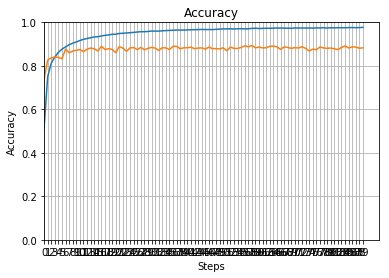

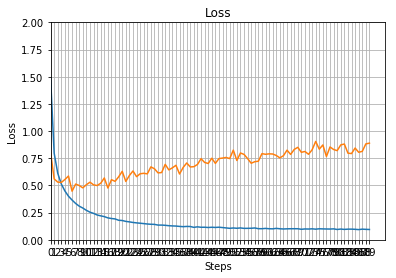

In [33]:
Plot_accuracy(history.history['acc'], history.history['val_acc'],"Accuracy")

Plot_Loss(history.history['loss'],history.history['val_loss'], "Loss")

    Test

In [34]:
predictions = model.predict(val_features)

#one hot encoding
for i in range(len(predictions)):
    length = len(predictions[i])
    index = np.argmax(predictions[i])
    predictions[i][index] = 1
    for j in range(length):
        if(j != index):
            predictions[i][j] = 0

In [35]:
print(classification_report(val_lab, predictions, target_names = dirlist_val))

             precision    recall  f1-score   support

       door       0.83      0.96      0.89       600
      chair       0.93      0.88      0.90      1500
  bookshelf       0.85      0.93      0.89      1500
    bathtub       0.93      0.80      0.86      1500
      bench       0.75      0.81      0.78       600
      table       0.86      0.89      0.87      1500
        bed       0.91      0.88      0.89      1500
       sofa       0.84      0.89      0.86      1500
       vase       0.93      0.86      0.89      1500
      plant       0.97      0.97      0.97      1500
       lamp       0.79      0.80      0.80       600
       sink       0.75      0.79      0.77       600
      stair       0.84      0.77      0.80       600
     toilet       0.93      0.98      0.95      1500

avg / total       0.89      0.88      0.88     16500



    Predict for one image

In [96]:
index = 5000
predictions = model.predict(np.reshape(conv_base.predict(val_img[index].reshape([1,img_size,img_size,3])), (1, 6 * 6 * 512)))

In [97]:
predictions

array([[1.5116871e-24, 7.1451787e-16, 6.9319187e-18, 1.0000000e+00,
        1.3790922e-13, 2.2439842e-10, 3.2565506e-10, 4.2690704e-09,
        3.2812152e-14, 2.5622387e-27, 1.7149212e-16, 1.3400983e-09,
        6.9564550e-16, 7.0758933e-11]], dtype=float32)

bathtub


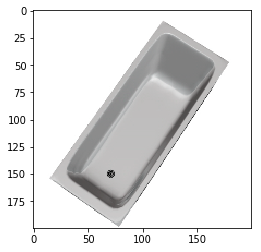

In [101]:
plt.imshow(val_img[index].astype(np.float32))
print(dirlist_val[np.argmax(predictions[0])])

In [99]:
import pandas as pd

table = pd.DataFrame()

table['Labels'] = dirlist_val
table['Value'] =  predictions[0].astype(np.float32)
table

,Labels,Value
0,door,1.511687e-24
1,chair,7.145179e-16
2,bookshelf,6.931919e-18
3,bathtub,1.000000e+00
4,bench,1.379092e-13
5,table,2.243984e-10
6,bed,3.256551e-10
7,sofa,4.269070e-09
8,vase,3.281215e-14
9,plant,2.562239e-27


    Save Model to Output folder

In [38]:
# serialize model to JSON
model_json = model.to_json()
with open("/output/model.json", "w") as json_file:
    json_file.write(model_json)


In [40]:
# serialize weights to HDF5
model.save_weights("/output/model.h5")
print("Saved model to disk")

Saved model to disk
